# Context Managers in Python

Context managers are a powerful Python feature that allows you to properly manage resources. They ensure that setup and cleanup code is executed, even if an error occurs.

## The `with` Statement

The most common way to use context managers is with the `with` statement:

```python
with open('file.txt', 'r') as f:
    data = f.read()
# File is automatically closed here
```

## Creating Custom Context Managers

There are two main ways to create context managers:

1. **Using a class** with `__enter__` and `__exit__` methods
2. **Using a generator function** with the `@contextmanager` decorator

## Example 1: Simple Timer Context Manager

Let's start with a simple example - a context manager that times how long a block of code takes to execute.

In [20]:
import time
from contextlib import contextmanager

@contextmanager
def timer(name="Operation"):
    """Context manager that measures execution time."""
    print(f"⏱️  Starting: {name}")
    start_time = time.time()
    
    try:
        yield
    finally:
        elapsed = time.time() - start_time
        print(f"✓ Finished: {name} took {elapsed:.3f} seconds")

### Using the Timer

Let's use our timer to measure different operations:

In [21]:
# Time a simple computation
with timer("Sum calculation"):
    result = sum(range(1000000))
    print(f"  Result: {result}")

print()

# Time a sleep operation
with timer("2-second sleep"):
    time.sleep(2)

print()

# Time a list comprehension
with timer("List comprehension"):
    squares = [x**2 for x in range(100000)]
    print(f"  Created list with {len(squares)} elements")

⏱️  Starting: Sum calculation
  Result: 499999500000
✓ Finished: Sum calculation took 0.017 seconds

⏱️  Starting: 2-second sleep
✓ Finished: 2-second sleep took 2.001 seconds

⏱️  Starting: List comprehension
  Created list with 100000 elements
✓ Finished: List comprehension took 0.004 seconds
✓ Finished: 2-second sleep took 2.001 seconds

⏱️  Starting: List comprehension
  Created list with 100000 elements
✓ Finished: List comprehension took 0.004 seconds


## Example 2: Matplotlib Plasma Color Context Manager

Let's create a context manager that temporarily changes matplotlib's default colors to use the plasma colormap.

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from contextlib import contextmanager

### Method 1: Using a Class

In [23]:
class PlasmaColors:
    """Context manager that changes matplotlib's default color cycle to plasma colors."""
    
    def __enter__(self):
        """Called when entering the 'with' block."""
        # Save the current color cycle
        self.original_prop_cycle = plt.rcParams['axes.prop_cycle']
        
        # Get colors from plasma colormap - reversed to go from yellow to purple
        # This makes it much more distinctive from default colors
        plasma_cmap = plt.cm.plasma_r  # reversed!
        colors = [plasma_cmap(i) for i in np.linspace(0.1, 0.9, 10)]
        
        # Set the new color cycle
        plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)
        
        print("✓ Plasma colors activated!")
        return self
    
    def __exit__(self, exc_type, exc_val, exc_tb):
        """Called when exiting the 'with' block."""
        # Restore the original color cycle
        plt.rcParams['axes.prop_cycle'] = self.original_prop_cycle
        
        print("✓ Original colors restored!")
        
        # Return False to propagate any exceptions
        return False

### Method 2: Using the `@contextmanager` Decorator

This is often more concise and easier to read:

In [24]:
@contextmanager
def plasma_colors():
    """Context manager that changes matplotlib's default color cycle to plasma colors."""
    # Setup: Save current state and apply new colors
    original_prop_cycle = plt.rcParams['axes.prop_cycle']
    
    plasma_cmap = plt.cm.plasma
    colors = [plasma_cmap(i/10) for i in range(10)]
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)
    
    print("✓ Plasma colors activated!")
    
    try:
        yield  # This is where the 'with' block executes
    finally:
        # Cleanup: Restore original state (always runs, even if exception occurs)
        plt.rcParams['axes.prop_cycle'] = original_prop_cycle
        print("✓ Original colors restored!")

## Demonstration

Let's see our context manager in action! We'll plot some data with default colors, then with plasma colors, and finally with default colors again.

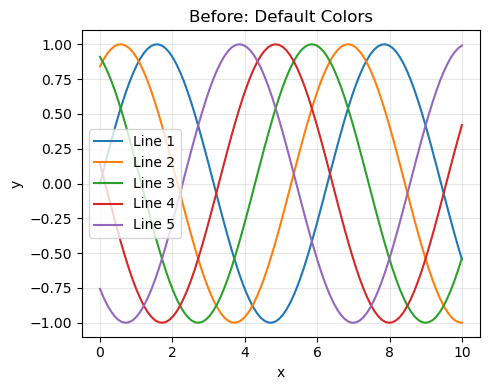

Plot 1 created with default colors

✓ Plasma colors activated!


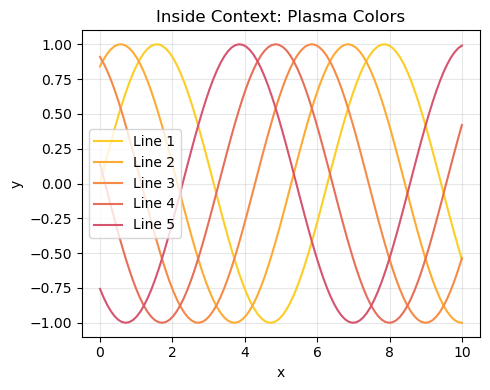

Plot 2 created with plasma colors

✓ Original colors restored!



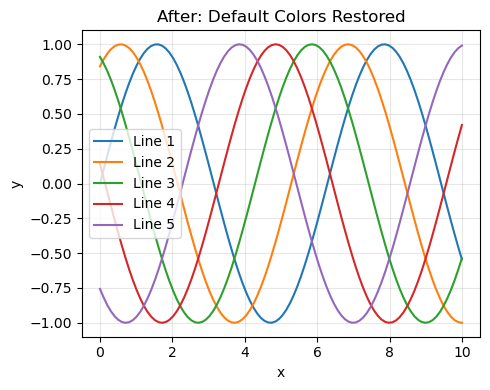

Plot 3 created with default colors again


In [25]:
# Generate some sample data
x = np.linspace(0, 10, 100)

# Before: Default colors
plt.figure(figsize=(5, 4))
for i in range(5):
    plt.plot(x, np.sin(x + i), label=f'Line {i+1}')
plt.title('Before: Default Colors')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Plot 1 created with default colors\n")

# During: Plasma colors (using the class-based context manager)
with PlasmaColors():
    plt.figure(figsize=(5, 4))
    for i in range(5):
        plt.plot(x, np.sin(x + i), label=f'Line {i+1}')
    plt.title('Inside Context: Plasma Colors')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    print("Plot 2 created with plasma colors\n")

print()  # Empty line after context manager

# After: Default colors restored
plt.figure(figsize=(5, 4))
for i in range(5):
    plt.plot(x, np.sin(x + i), label=f'Line {i+1}')
plt.title('After: Default Colors Restored')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Plot 3 created with default colors again")

### Using the Decorator Version

Let's also try the `@contextmanager` version:

✓ Plasma colors activated!
✓ Original colors restored!


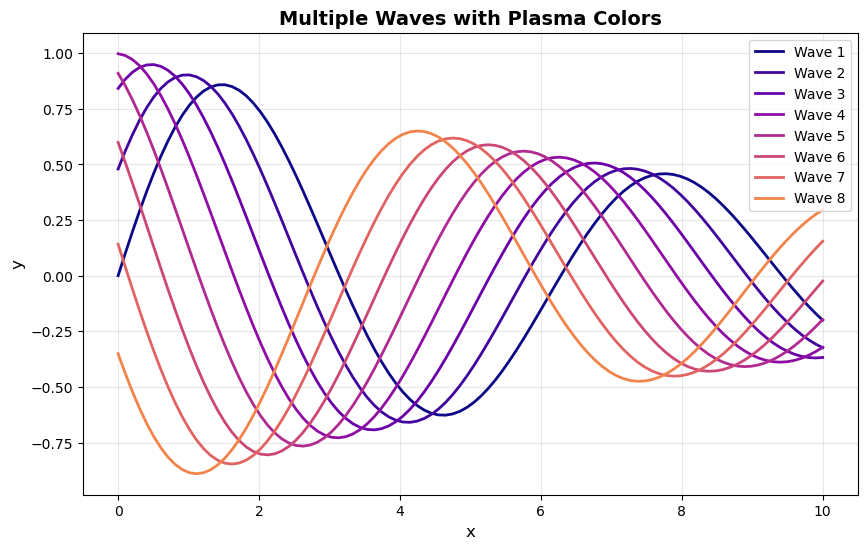

In [26]:
plt.figure(figsize=(10, 6))

# Use the decorator-based context manager
with plasma_colors():
    for i in range(8):
        y = np.sin(x + i*0.5) * np.exp(-x/10)
        plt.plot(x, y, label=f'Wave {i+1}', linewidth=2)

plt.title('Multiple Waves with Plasma Colors', fontsize=14, fontweight='bold')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()

## Key Benefits of Context Managers

1. **Automatic cleanup**: Resources are always properly released, even if an error occurs
2. **Cleaner code**: No need for explicit try/finally blocks
3. **Reusability**: Package common setup/teardown patterns for reuse
4. **Clear intent**: Makes it obvious when temporary states are being used

## Common Use Cases

- File handling (`with open(...)`)
- Database connections
- Locks and synchronization
- Temporary state changes (like our matplotlib example)
- Timer contexts
- Suppressing exceptions
- Redirecting output